# <center> Ait Ettajer Haytham</center> 

# Algorithms for Data Science

## Filtering Stream Items

### 1. Preliminaries 

The objective of this lab is to implement algorithms for filtering "good" items on streams. We will start by the simple implementation using only one hash function, and then it will be required of you to implement the full Bloom filter. We assume a random stream $S$ of integers in a given range $\{0, \dots, m-1\}$. We assume that the first $g$ ids are the good ids, that we have $n$ bits allocated in the bit array $B$ (for simplicity, implemented as an array here).

In [1]:
import random
from string import ascii_lowercase

#parameters
m = 100
g = 80
stream_size = 10000
n = 256

#generate some random strings of size 5 + 1 + 5
D = []
for _ in range(m):
  D.append(''.join(random.choice(ascii_lowercase) for i in range(5))+\
           '@'+''.join(random.choice(ascii_lowercase) for i in range(5)))

#allocate the array of 0s
B = [0] * n

### 2. Creating a Hash Function, Filtering Items Using a Single Hash

In the following we create a hash function $h(x)$, which also takes as a parameter a value and $n$, and returns a value in $0\dots n$. We populate the byte array $B$, and then we simulate a stream taking random values from $D$ and checking whether the value is good or not. We measure the true positive, false positive, and false negative rates. 

In [2]:
#hash function
def h(x,n):
  return hash(x)%n

good_set = set(D[:g]) #just for checking TP and FP rates

#fill the byte array
for i in range(g): B[h(D[i],n)] = 1

tp = 0
fp = 0
tn = 0
fn = 0

#simulate a stream
for _ in range(stream_size):
  #take a random email
  s = random.choice(D)
  #check its hash value
  if B[h(s,n)]==1: #good
    if s not in good_set:
      fp += 1
    else:
      tp += 1
  else: #bad -- this is just a sanity check
    if s in good_set:
      fn += 1
    else:
      tn += 1

print('True positive rate: %f'%(float(tp)/float(tp+fp)))
print('False positive rate: %f'%(float(fp)/float(tp+fp)))

print('False negative rate: %f'%(float(fn)/float(tn+fn)))

True positive rate: 0.942000
False positive rate: 0.058000
False negative rate: 0.000000


If we want to create a random hash function, we can pass a random byte string as a parameter that we use to scramble the original Python hash of the item we check.

In [3]:
mask = random.getrandbits(64)

def h(x,mask,n):
  return (hash(x)^mask)%n

#reinitialize the array, for testing
B = [0] * n

for i in range(g): 
  B[h(D[i],mask,n)] = 1

print(B)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


### 3. **TASK** - Bloom Filters

Your task is to implement the Bloom filters as described in the class lecture. For this, you have to:
1. generate $k$ random hash functions (_hint_: use the example shown above)
2. initialize $B$, by setting $1$ in each $h_i(x)$, $i\in\{1,\dots,k\}$, for all items $x$ in the good set
3. an item $s$ in the stream is considered good if, for all $i\in\{1,\dots,k\}$, we have $B[h_i(s)]=1$

Measure the true positive and false positive rate for various values of $k$ and compare to the values obtained when setting $k=n/m\ln 2$ (to the nearest integer value). What do you notice?

In [4]:
# YOUR CODE HERE


In [5]:
# Extrat Parametter
import math
import matplotlib.pyplot as plt

# 𝑘=𝑛/𝑚ln2 
𝑛_div_𝑚ln2 = math.floor(n*math.log(2)/m)

# number of hashing function
total_Hashing_function = n-1

# buil the array random mask for hashing function
array_mask_func_hash = [random.getrandbits(64) for i in range(total_Hashing_function)]

# This array will contain the values of true and false positive rate
true_positive_rate = []
false_positive_rate = []

# Build Hashing random Function
def random_hashing_function(numb_func,keys,n):
    return (hash(keys)^array_mask_func_hash[numb_func-1])%n

In [6]:
def Bloom_Filters(k):
    
    #reinitialize the array, for testing
    B = [0] * n
    
    #fill the byte array
    for i in range(g):
        for j in range(k):
            B[random_hashing_function(j,D[i],n)] = 1
            
    fp = 0
    tp = 0
    #simulate a stream
    for _ in range(stream_size):
        
        #take a random email
        s = random.choice(D)

        # We suppose the item is good
        item_is_good = True
        
        # we verify if this supposition is okay
        for i in range(k):
            if(B[random_hashing_function(i,s,n)]!=1):
                item_is_good = False
                break
    
        if (item_is_good): #good
            if s not in good_set:
                fp += 1
            else:
                tp += 1
        
    false_positive_rate1 = float(fp)/float(tp+fp)
    true_positive_rate2 = float(tp)/float(tp+fp)
    
    return true_positive_rate2, false_positive_rate1

In [7]:
for kk in range(100):
    true_positive_rate2, false_positive_rate1 = Bloom_Filters(kk+1)
    true_positive_rate.append(true_positive_rate2)
    false_positive_rate.append(false_positive_rate1)

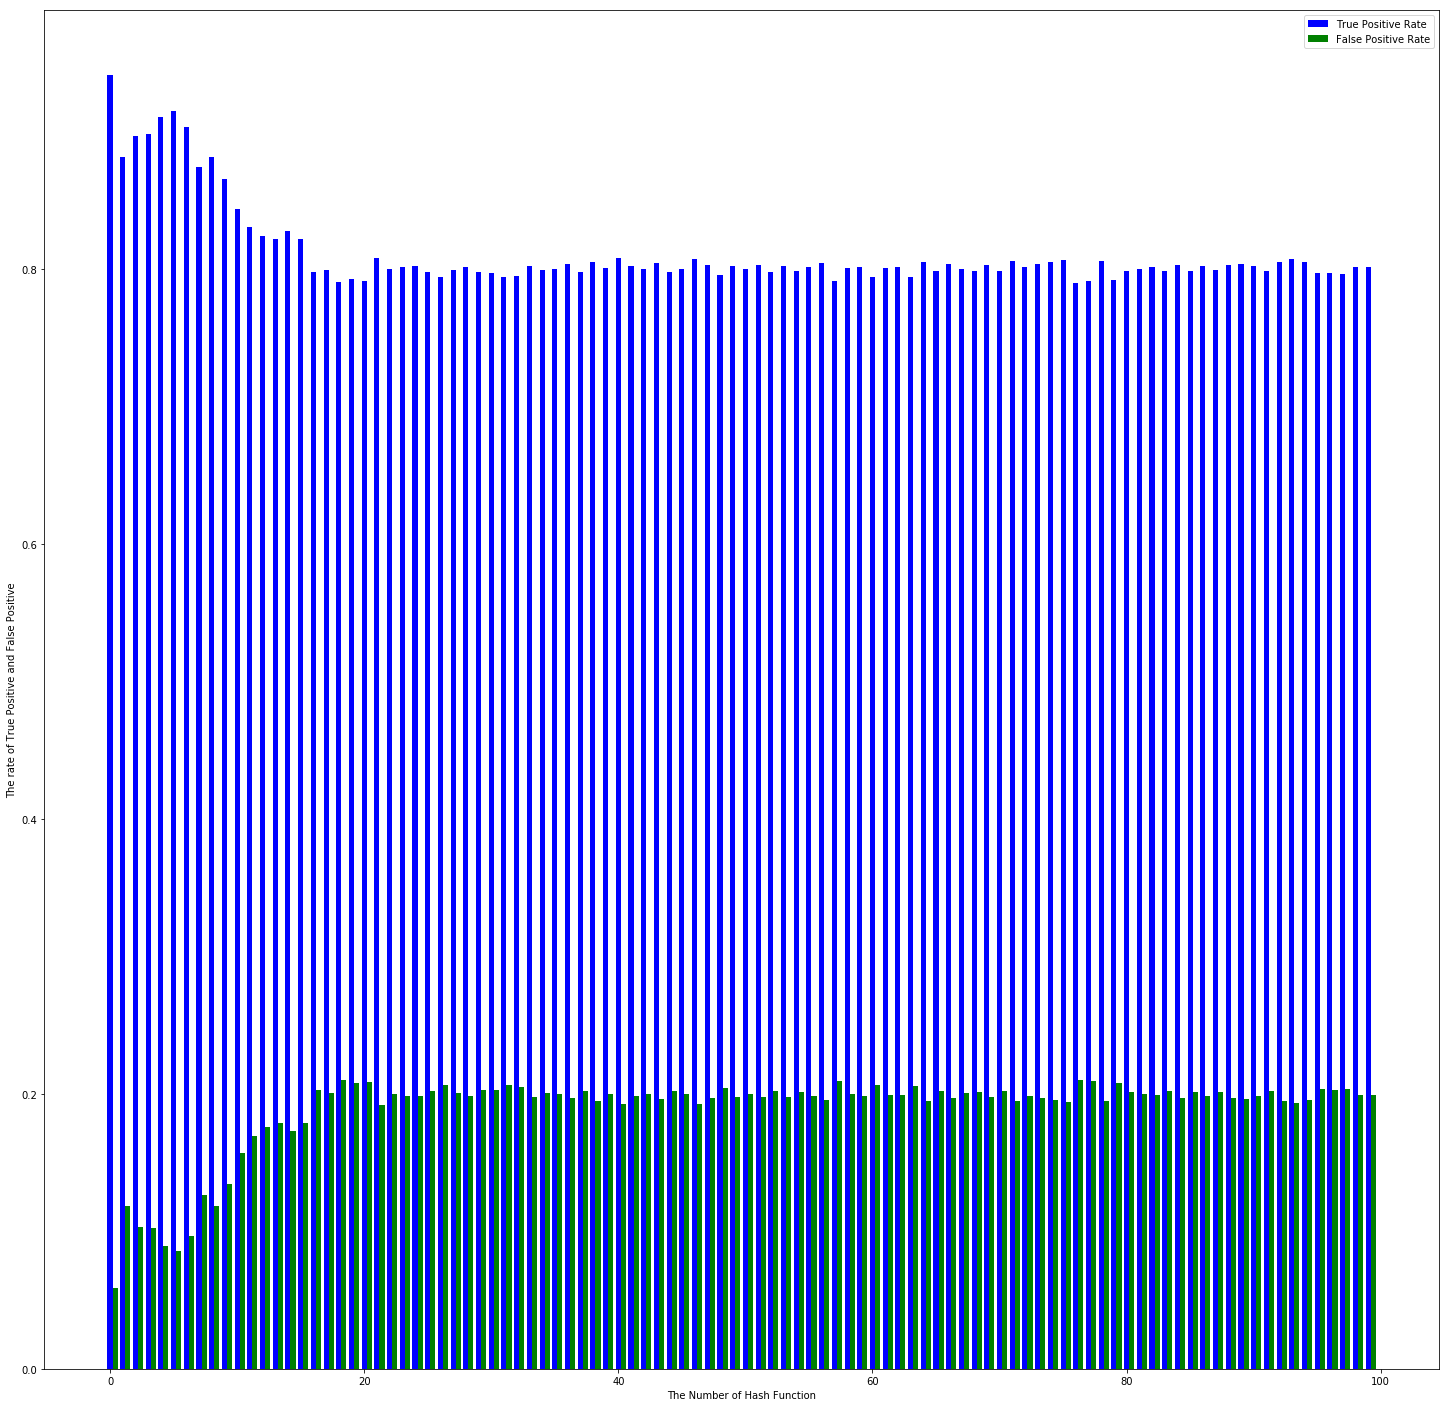

𝑛/𝑚ln2                              ==  1

Max Value of True Positive Rate     ==  0.9411764705882353
Min Value of False Positive Rate    ==  0.058823529411764705

true_positive_rate[ 1 ]             ==  0.9411764705882353
false_positive_rate[ 1 ]            ==  0.058823529411764705


In [8]:
plt.figure(figsize=(25,25))
barWidth = 0.4
r1 = range(len(true_positive_rate))
r2 = [x + barWidth for x in r1]
plt.bar(r1, true_positive_rate, width = barWidth, color = ['blue' for i in true_positive_rate], linewidth = 2)
plt.bar(r2, false_positive_rate, width = barWidth, color = ['green' for i in false_positive_rate], linewidth = 4)
plt.xlabel('The Number of Hash Function')
plt.ylabel('The rate of True Positive and False Positive')
plt.legend(labels=['True Positive Rate', 'False Positive Rate'])
plt.show()

print("𝑛/𝑚ln2                              == ",𝑛_div_𝑚ln2)
print('')
print('Max Value of True Positive Rate     == ',max(true_positive_rate))
print('Min Value of False Positive Rate    == ',min(false_positive_rate))
print('')
print('true_positive_rate[',𝑛_div_𝑚ln2,']             == ',true_positive_rate[𝑛_div_𝑚ln2-1])
print('false_positive_rate[',𝑛_div_𝑚ln2,']            == ',false_positive_rate[𝑛_div_𝑚ln2-1])

_You can use this cell to write your discussion of the results_

# $\color{blue}{Notice}$ : Note that if the number of hash functions is equal to n/mln(2) then we have the maximum value of $\color{red}{True  Positive Rate}$  and the minimum value of $\color{red}{False  Positive Rate}$. This relation satisfies the theorem of Bloom filter analysis in the courses : Optimal Number of Hash Functions equal $k = \frac{n}{m}len(2)$
        